In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

In [7]:
df = pd.read_csv('/Users/gouzepeng/OneDrive/王成军音乐/数据/music_dataset.csv',low_memory=False)

In [3]:
data=pd.read_csv('/Users/gouzepeng/OneDrive/王成军音乐/数据/datalyric.csv',low_memory=False)

In [5]:
data.columns.tolist()

['Unnamed: 0',
 'album_id_x',
 'album_name_x',
 'album_size_x',
 'music_id',
 'music_name',
 'music_score_x',
 'artist_name_x',
 'artist_id_x',
 'artist_albumSize',
 'artist_musicSize',
 'album_name_y',
 'album_publishTime_x',
 'album_size_y',
 'album_subType',
 'album_tags',
 'album_company',
 'album_type',
 'album_html',
 'artist_name_y',
 'artist_gender',
 'artist_name',
 'hotornot',
 'total',
 'userid',
 'commentid',
 'likedcount_x',
 'firstcomtime_x',
 'city',
 'province',
 'followeds_x',
 'createdays_x',
 'listensongs_x',
 'eventcount_x',
 'album_id_y',
 'music_score_y',
 'artist_id_y',
 'album_publishTime_y',
 'model_topic1',
 'model_topic2',
 'model_topic3',
 'model_topic4',
 'model_topic5',
 'topic1_ad',
 'topic2_ad',
 'topic3_ad',
 'topic4_ad',
 'topic5_ad',
 'score',
 'posscore',
 'negscore',
 'hao',
 'le',
 'ai',
 'nu',
 'ju',
 'er',
 'jing',
 'total_log',
 'daygap',
 'comlastdays',
 'isgenderexis',
 'isgenderman',
 'isageexis',
 'ageclean_x',
 'verified_x',
 'payinguser_x'

In [21]:
data['musicscore_log']

0         4.605170
1         4.605170
2         4.605170
3         4.605170
4         4.605170
            ...   
113106    2.995732
113107    3.218876
113108    2.995732
113109    2.302585
113110    4.442651
Name: musicscore_log, Length: 113111, dtype: float64

In [4]:
data['albumnum_log'].describe()

count    113111.000000
mean          3.477721
std           1.089636
min           0.000000
25%           2.833213
50%           3.526361
75%           4.204693
max           6.903747
Name: albumnum_log, dtype: float64

In [6]:
data['comment_log'].describe()

count    113111.000000
mean          5.880782
std           1.687754
min           0.000000
25%           4.672829
50%           5.683580
75%           7.025538
max          14.747219
Name: comment_log, dtype: float64

In [7]:
data['musicscore_log'].describe()

count    113111.000000
mean          3.633524
std           0.810120
min           1.609438
25%           2.995732
50%           3.688879
75%           4.442651
max           4.605170
Name: musicscore_log, dtype: float64

In [8]:
data['like_log'].describe()

count    113111.000000
mean          4.783584
std           1.630520
min           2.302585
25%           3.617652
50%           4.499810
75%           5.587997
max          12.511716
Name: like_log, dtype: float64

In [9]:
data['mlyric_negscore'].describe()

count    113111.000000
mean        -31.795119
std          22.151474
min        -329.867884
25%         -41.750531
50%         -27.254568
75%         -16.492739
max           0.000000
Name: mlyric_negscore, dtype: float64

In [10]:
data['negscore'].describe()

count    113111.000000
mean          3.383738
std           2.445008
min           0.000000
25%           1.759344
50%           3.022326
75%           4.499594
max          32.935372
Name: negscore, dtype: float64

In [11]:
data['model_topic1_ad'].describe()

count    113111.000000
mean          0.490532
std           0.310099
min           0.000000
25%           0.333333
50%           0.500000
75%           0.666667
max           1.000000
Name: model_topic1_ad, dtype: float64

In [12]:
data['model_topic2_ad'].describe()

count    113111.000000
mean          0.502634
std           0.311820
min           0.000000
25%           0.333333
50%           0.500000
75%           0.666667
max           1.000000
Name: model_topic2_ad, dtype: float64

In [13]:
data['model_topic3_ad'].describe()

count    113111.000000
mean          0.495013
std           0.309889
min           0.000000
25%           0.333333
50%           0.500000
75%           0.666667
max           1.000000
Name: model_topic3_ad, dtype: float64

In [14]:
data['model_topic4_ad'].describe()

count    113111.000000
mean          0.497507
std           0.310324
min           0.000000
25%           0.333333
50%           0.500000
75%           0.666667
max           1.000000
Name: model_topic4_ad, dtype: float64

In [15]:
data['model_topic5_ad'].describe()

count    113111.000000
mean          0.516349
std           0.311732
min           0.000000
25%           0.333333
50%           0.500000
75%           0.714286
max           1.000000
Name: model_topic5_ad, dtype: float64

In [20]:
data['lyric_topic5_ad'].describe()

count    113111.000000
mean          0.163936
std           0.370219
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: lyric_topic5_ad, dtype: float64

In [8]:
print(df.columns.tolist())

['Unnamed: 0', 'album_id_x', 'album_name_x', 'album_size_x', 'music_id', 'music_name', 'music_score_x', 'artist_name_x', 'artist_id_x', 'artist_albumSize', 'artist_musicSize', 'album_name_y', 'album_publishTime_x', 'album_size_y', 'album_subType', 'album_tags', 'album_company', 'album_type', 'album_html', 'artist_name_y', 'artist_gender', 'artist_name', 'hotornot', 'total', 'userid', 'commentid', 'likedcount_x', 'firstcomtime_x', 'city', 'province', 'followeds_x', 'createdays_x', 'listensongs_x', 'eventcount_x', 'album_id_y', 'music_score_y', 'artist_id_y', 'album_publishTime_y', 'model_topic1', 'model_topic2', 'model_topic3', 'model_topic4', 'model_topic5', 'topic1_ad', 'topic2_ad', 'topic3_ad', 'topic4_ad', 'topic5_ad', 'score', 'posscore', 'negscore', 'hao', 'le', 'ai', 'nu', 'ju', 'er', 'jing', 'total_log', 'daygap', 'comlastdays', 'isgenderexis', 'isgenderman', 'isageexis', 'ageclean_x', 'verified_x', 'payinguser_x', 'userlevel_x', 'contentlength', 'ispositive_x', 'isnegative_x', 

In [23]:
df[['artist_id_x','music_id','comment_log','like_log','artist_gender','songnum_log','albumnum_log']].describe()

,artist_id_x,music_id,comment_log,like_log,songnum_log,albumnum_log
count,4.788640e+05,4.788640e+05,187644.000000,187644.000000,478864.000000,478864.000000
mean,7.727965e+06,2.254837e+13,5.647977,4.620773,5.416718,3.606131
std,1.124615e+07,1.103297e+16,1.675548,1.571951,1.737273,1.262140
min,1.875000e+03,5.986700e+04,0.000000,2.302585,0.000000,0.000000
25%,9.026000e+03,4.872241e+06,4.430817,3.496508,4.110874,2.890372
50%,8.277280e+05,5.133958e+08,5.451038,4.347425,5.236442,3.610918
75%,1.230816e+07,1.387334e+09,6.793466,5.378687,6.603944,4.369448
max,3.759322e+07,5.398634e+18,14.747219,12.935872,9.431642,6.903747


#### 检查缺失值

In [14]:
musicdat = df[df.isnull().values==True]

In [16]:
musicdat

,Unnamed: 0,album_id_x,album_name_x,album_size_x,music_id,music_name,music_score_x,artist_name_x,artist_id_x,artist_albumSize,...,mlyric_er,mlyric_jing,comment_log,contentlength_log,musicscore_log,like_log,male,female,songnum_log,albumnum_log
0,0,98887598,奔山赴海去见你,2,1499014574,奔山赴海去见你,100.0,阿冗,30116848,13,...,0.0,0.0,7.210818,4.001254,4.605170,4.465142,1,0,3.367296,2.639057
1,1,98887598,奔山赴海去见你,2,1499015504,奔山赴海去见你 (伴奏),65.0,阿冗,30116848,13,...,NaN,NaN,NaN,NaN,4.174387,NaN,1,0,3.367296,2.639057
1,1,98887598,奔山赴海去见你,2,1499015504,奔山赴海去见你 (伴奏),65.0,阿冗,30116848,13,...,NaN,NaN,NaN,NaN,4.174387,NaN,1,0,3.367296,2.639057
1,1,98887598,奔山赴海去见你,2,1499015504,奔山赴海去见你 (伴奏),65.0,阿冗,30116848,13,...,NaN,NaN,NaN,NaN,4.174387,NaN,1,0,3.367296,2.639057
1,1,98887598,奔山赴海去见你,2,1499015504,奔山赴海去见你 (伴奏),65.0,阿冗,30116848,13,...,NaN,NaN,NaN,NaN,4.174387,NaN,1,0,3.367296,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478863,478863,95743820,中国新精神,1,1481371072,仌,85.0,口水男孩,36857713,1,...,0.0,0.0,6.963190,4.644391,4.442651,5.446737,0,0,0.000000,0.000000
478863,478863,95743820,中国新精神,1,1481371072,仌,85.0,口水男孩,36857713,1,...,0.0,0.0,6.963190,4.644391,4.442651,5.446737,0,0,0.000000,0.000000
478863,478863,95743820,中国新精神,1,1481371072,仌,85.0,口水男孩,36857713,1,...,0.0,0.0,6.963190,4.644391,4.442651,5.446737,0,0,0.000000,0.000000
478863,478863,95743820,中国新精神,1,1481371072,仌,85.0,口水男孩,36857713,1,...,0.0,0.0,6.963190,4.644391,4.442651,5.446737,0,0,0.000000,0.000000


In [18]:
musicdat2 = df[df['comment_log'].isnull().values==True]

In [22]:
musicdat2[151:200]

,Unnamed: 0,album_id_x,album_name_x,album_size_x,music_id,music_name,music_score_x,artist_name_x,artist_id_x,artist_albumSize,...,mlyric_er,mlyric_jing,comment_log,contentlength_log,musicscore_log,like_log,male,female,songnum_log,albumnum_log
449,449,84989943,对不起 这次我必须赢,10,1416750074,凡事皆有终,25.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.218876,NaN,1,0,5.533389,3.912023
451,451,84989943,对不起 这次我必须赢,10,1416747850,奉陪到底,20.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,2.995732,NaN,1,0,5.533389,3.912023
452,452,84989943,对不起 这次我必须赢,10,1416750073,和人求利,45.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.806662,NaN,1,0,5.533389,3.912023
454,454,84989943,对不起 这次我必须赢,10,1416747852,全力以赴,15.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,2.708050,NaN,1,0,5.533389,3.912023
455,455,84989943,对不起 这次我必须赢,10,1416747857,先懂失去再拥有,20.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,2.995732,NaN,1,0,5.533389,3.912023
463,463,82803431,少年的你,6,1399705864,如此美丽 (DJ版),10.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,2.302585,NaN,1,0,5.533389,3.912023
465,465,82803431,少年的你,6,1399705866,王者荣耀 (DJ版),25.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.218876,NaN,1,0,5.533389,3.912023
466,466,82803431,少年的你,6,1399706773,那个女孩 (咚鼓版),50.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.912023,NaN,1,0,5.533389,3.912023
467,467,82803076,世间美好与你环环相扣,4,1399705088,世间万物人海茫茫,40.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.688879,NaN,1,0,5.533389,3.912023
471,471,82622574,我承认我自卑,5,1398472937,主动选择孤独,35.0,安筱冷,28387245,50,...,NaN,NaN,NaN,NaN,3.555348,NaN,1,0,5.533389,3.912023


In [22]:
dat = df[df['comment_log'].isnull().values==False]

In [23]:
dat

,Unnamed: 0,album_id_x,album_name_x,album_size_x,music_id,music_name,music_score_x,artist_name_x,artist_id_x,artist_albumSize,...,mlyric_er,mlyric_jing,comment_log,contentlength_log,musicscore_log,like_log,male,female,songnum_log,albumnum_log
0,0,98887598,奔山赴海去见你,2,1499014574,奔山赴海去见你,100.0,阿冗,30116848,13,...,0.0,0.0,7.210818,4.001254,4.605170,4.465142,1,0,3.367296,2.639057
2,2,97891010,三个字,2,1492899961,三个字,100.0,阿冗,30116848,13,...,1.0,0.0,7.890957,3.568593,4.605170,5.835785,1,0,3.367296,2.639057
4,4,91648613,靠窗,6,1458789926,情歌几句,100.0,阿冗,30116848,13,...,1.0,0.0,8.213653,3.541925,4.605170,6.823068,1,0,3.367296,2.639057
5,5,91648613,靠窗,6,1458990369,靠窗,100.0,阿冗,30116848,13,...,1.0,0.0,7.832808,3.913355,4.605170,5.987624,1,0,3.367296,2.639057
6,6,91648613,靠窗,6,1458994212,你我之间,100.0,阿冗,30116848,13,...,0.0,0.0,8.249052,3.325036,4.605170,7.046763,1,0,3.367296,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478822,478822,34977379,翘翘翻唱,26,1420789476,繁花（翻自 群星）,25.0,翘翘,12147293,10,...,0.0,0.0,4.007333,3.135494,3.218876,3.583519,0,0,3.637586,2.302585
478823,478823,34977379,翘翘翻唱,26,440348011,莫唱白首（Cover 百恋歌）,20.0,翘翘,12147293,10,...,0.0,0.0,4.919981,4.290459,2.995732,3.784190,0,0,3.637586,2.302585
478835,478835,34977379,翘翘翻唱,26,439139002,如果记忆干涸（Cover 填词 浅染）,10.0,翘翘,12147293,10,...,0.0,0.0,3.970292,3.970292,2.302585,2.890372,0,0,3.637586,2.302585
478858,478858,75149623,Demo,6,1340080287,迷失广州(配乐版）,55.0,唯利玉碎计划,1159156,3,...,NaN,NaN,5.655992,3.643417,4.007333,4.379245,0,0,2.833213,1.098612


In [2]:
dd = '/Users/gouzepeng/OneDrive/王成军音乐/数据/hotcom after code slimversion.csv'
dd= pd.read_csv(dd,sep='\t',encoding='utf-8',lineterminator="\n",error_bad_lines=False,
                  names=['music_id','total','userid','commentid','content','likedcount','firstcomtime',
 'city','province','followeds','createdays','listensongs','eventcount',
 'album_id','music_score','artist_id','album_publishTime','cut_text',
 'model_topic1','model_topic2','model_topic3','model_topic4','model_topic5','model_max',
 'topic1_ad','topic2_ad','topic3_ad','topic4_ad','topic5_ad',
 'score','posscore','negscore','senclass3','hao','le','ai','nu','ju','er','jing',
 'total_log','daygap','comlastdays','isgenderexis','isgenderman','isageexis','ageclean',
            'verified','payinguser','userlevel','contentlength','clean_text',
 'ispositive','isnegative','posdiffneg','hour','time1','time2','time3','time4'])
dd

,music_id,total,userid,commentid,content,likedcount,firstcomtime,city,province,followeds,...,contentlength,clean_text,ispositive,isnegative,posdiffneg,hour,time1,time2,time3,time4
0,1499014574,1354,135912165,5170538029,说说你最想见的那个人吧,310,1606665646528,440300.0,440000.0,563958.0,...,11,说说你最想见的那个人吧,0,1,1.921439,0,1,0,0,0
1,1499014574,1354,398553748,5170545648,高中班主任说过，如果你爱一个人，不是下课给人家买买水，不是短信发来发去，也不是周末一起出来唱...,248,1606665646528,371500.0,370000.0,31.0,...,110,高中班主任说过如果你爱一个人不是下课给人家买买水不是短信发来发去也不是周末一起出来唱唱歌聊聊...,1,0,21.450770,1,1,0,0,0
2,1499014574,1354,493139069,5170794907,“会有人给你买花 匆匆忙忙的想去见你”,165,1606665646528,100.0,0.0,52.0,...,16,会有人给你买花匆匆忙忙的想去见你,0,1,5.880601,11,0,0,1,0
3,1499014574,1354,1655558774,5170542409,玫瑰在小王子离开时这样说，我当然爱你，没有让你感觉到，是我的不对。\r\r\r\r\r\r\...,88,1606665646528,100.0,0.0,11.0,...,32,玫瑰在小王子离开时这样说我当然爱你没有让你感觉到是我的不对小王子,1,0,10.764273,0,1,0,0,0
4,1499014574,1354,3810580330,5170546238,第一次听到一个男孩子和我说 “异地恋很辛苦 我怕你会不喜欢我真的很怕 以后我们一定要住一起”,75,1606665646528,430500.0,430000.0,6.0,...,41,第一次听到一个男孩子和我说异地恋很辛苦我怕你会不喜欢我真的很怕以后我们一定要住一起,0,1,12.249062,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313467,1340080287,286,407995123,3210915460,如果你说一个大学生晚上去陪酒，听起来感觉不太好，可然后你说一个小姐白天去听大学课，就满满的正...,30,1547645484664,100.0,0.0,79.0,...,121,如果你说一个大学生晚上去陪酒听起来感觉不太好可然后你说一个小姐白天去听大学课就满满的正能量了...,0,1,35.490188,12,0,0,1,0
1313468,1340080287,286,350849809,3142083065,广州哪有什么夜景 站高了看出去全是野心\r\r\r\r\r\r\r\r\n连理想都有铜臭味\...,24,1547645484664,100.0,0.0,211.0,...,26,广州哪有什么夜景站高了看出去全是野心连理想都有铜臭味,1,0,9.299903,7,0,1,0,0
1313469,1340080287,286,1841739264,3280439543,人们总把少年的勇气叫作叛逆，把成年人的懦弱叫作顾全大局。,17,1547645484664,441900.0,440000.0,3.0,...,26,人们总把少年的勇气叫作叛逆把成年人的懦弱叫作顾全大局,1,0,5.113344,14,0,0,0,1
1313470,1340080287,286,1305714213,1552977993,他們只會叫你卜街,10,1547645484664,810100.0,810000.0,6.0,...,8,他們只會叫你卜街,0,0,0.000000,4,0,1,0,0


In [3]:
dd['model_topic1_ad'] = [1 if i > np.median(dd['model_topic1']) else 0  for i in dd['model_topic1'] ]
dd['model_topic2_ad'] = [1 if i > np.median(dd['model_topic2']) else 0  for i in dd['model_topic2'] ]
dd['model_topic3_ad'] = [1 if i > np.median(dd['model_topic3']) else 0  for i in dd['model_topic3'] ]
dd['model_topic4_ad'] = [1 if i > np.median(dd['model_topic4']) else 0  for i in dd['model_topic4'] ]
dd['model_topic5_ad'] = [1 if i > np.median(dd['model_topic5']) else 0  for i in dd['model_topic5'] ]

In [6]:
dd.to_csv('/Users/gouzepeng/OneDrive/王成军音乐/数据/topic_ad.csv')

In [4]:
dd_group = dd.groupby('music_id').mean()
dd_group['music_id'] = dd_group.index
ad = dd_group.reset_index(drop=True)
ad

,total,userid,commentid,likedcount,firstcomtime,city,province,followeds,createdays,listensongs,...,time1,time2,time3,time4,model_topic1_ad,model_topic2_ad,model_topic3_ad,model_topic4_ad,model_topic5_ad,music_id
0,6015.0,2.484405e+08,8.624030e+08,737.600000,1.382251e+12,397313.466667,396666.666667,59.866667,1888.200000,7495.000000,...,0.333333,0.133333,0.533333,0.000000,0.266667,0.200000,0.666667,0.533333,0.600000,59867
1,352.0,7.335858e+06,5.079178e+07,139.000000,1.369816e+12,320100.000000,320000.000000,8.000000,2458.000000,12203.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,59870
2,1101.0,2.333182e+08,4.488235e+08,179.727273,1.384125e+12,467500.000000,466363.636364,4236.090909,2034.818182,11654.363636,...,0.454545,0.000000,0.181818,0.363636,0.636364,0.454545,0.090909,0.727273,0.454545,59875
3,452.0,2.061490e+08,3.939771e+08,186.666667,1.370786e+12,216833.333333,216666.666667,5.666667,1908.000000,13590.666667,...,0.000000,0.000000,0.333333,0.666667,0.000000,1.000000,0.000000,0.666667,0.666667,59877
4,251.0,7.164694e+08,1.194665e+09,18.333333,1.423879e+12,210100.000000,210000.000000,216.333333,1547.000000,2227.000000,...,0.333333,0.000000,0.333333,0.333333,0.666667,1.000000,0.000000,0.000000,0.333333,59884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187639,1486.0,7.791895e+08,5.172498e+09,228.400000,1.606900e+12,319746.866667,319333.333333,45645.333333,1339.266667,4295.333333,...,0.066667,0.000000,0.066667,0.866667,0.800000,0.466667,0.600000,0.266667,0.266667,1499826551
187640,38.0,1.073128e+08,5.172429e+09,10.000000,1.606903e+12,110101.000000,110000.000000,1710.000000,1840.000000,3052.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1499856631
187641,22.0,3.267663e+08,5.172930e+09,17.000000,1.606902e+12,440100.000000,440000.000000,5.000000,1557.000000,4088.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1499867079
187642,152.0,2.747955e+08,5.172400e+09,52.000000,1.606904e+12,100.000000,0.000000,2751.000000,1674.000000,3585.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1499877308


In [ ]:
topic_ads = []
for i in dd.index:
    blist = [0, 0, 0, 0, 0]
    alist = [dd['model_topic'+str(j)].iloc[i] for j in range(1, 6)]
    max_pos = np.argmax(alist) 
    if alist[max_pos] > np.median(dd['model_topic'+str(max_pos+1)]):
        blist[max_pos] = 1
    topic_ads.append(blist)

In [ ]:
t1, t2, t3, t4, t5 = np.array([[0, 0, 0, 0, 0],[1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]]).T

In [ ]:
def get_icc(results):
    '''get the Intraclass Correlation Coefficient (ICC)'''
    icc = results.cov_re / (results.cov_re + results.scale)
    
    return icc.values[0, 0]

In [40]:
model = sm.MixedLM.from_formula("comment_log ~ like_log", dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: comment_log 
No. Observations: 187644  Method:             REML        
No. Groups:       6596    Scale:              0.3849      
Min. group size:  1       Log-Likelihood:     -182612.5838
Max. group size:  2475    Converged:          Yes         
Mean group size:  28.4                                    
-----------------------------------------------------------
            Coef.  Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   1.426     0.007  194.897  0.000   1.412   1.441
like_log    0.925     0.001  845.387  0.000   0.923   0.927
Group Var   0.144     0.005                                

icc:  0.2720350920454328


In [41]:
model = sm.MixedLM.from_formula("comment_log ~ like_log+male+female+songnum_log+albumnum_log", 
                                dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: comment_log 
No. Observations: 187644  Method:             REML        
No. Groups:       6596    Scale:              0.3849      
Min. group size:  1       Log-Likelihood:     -182413.0289
Max. group size:  2475    Converged:          Yes         
Mean group size:  28.4                                    
----------------------------------------------------------
               Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       1.646    0.017  94.177 0.000  1.612  1.680
like_log        0.924    0.001 844.750 0.000  0.922  0.926
male            0.097    0.013   7.605 0.000  0.072  0.122
female         -0.030    0.013  -2.273 0.023 -0.056 -0.004
songnum_log    -0.109    0.006 -17.259 0.000 -0.121 -0.096
albumnum_log    0.058    0.007   8.532 0.000  0.044  0.071
Group Var       0.132    0.005                            

icc:  0

In [42]:
model = sm.MixedLM.from_formula("comment_log ~ like_log+male+female+songnum_log+albumnum_log+like_log*male+like_log*female", 
                                dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: comment_log 
No. Observations:  187644  Method:             REML        
No. Groups:        6596    Scale:              0.3844      
Min. group size:   1       Log-Likelihood:     -182285.9046
Max. group size:   2475    Converged:          Yes         
Mean group size:   28.4                                    
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        1.519    0.019  79.604 0.000  1.481  1.556
like_log         0.954    0.002 454.193 0.000  0.950  0.958
male             0.276    0.017  15.804 0.000  0.242  0.310
female           0.144    0.018   7.854 0.000  0.108  0.180
songnum_log     -0.108    0.006 -17.147 0.000 -0.120 -0.095
albumnum_log     0.058    0.007   8.514 0.000  0.044  0.071
like_log:male   -0.041    0.003 -15.263 0.000 -0.04

In [43]:
model = sm.MixedLM.from_formula("musicscore_log ~ like_log+male+female+songnum_log+albumnum_log+like_log*male+like_log*female", 
                                dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: musicscore_log
No. Observations: 187644  Method:             REML          
No. Groups:       6596    Scale:              0.2848        
Min. group size:  1       Log-Likelihood:     -155723.2903  
Max. group size:  2475    Converged:          Yes           
Mean group size:  28.4                                      
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         2.198    0.020 112.364 0.000  2.160  2.236
like_log          0.336    0.002 184.130 0.000  0.332  0.340
male              0.490    0.017  28.064 0.000  0.456  0.524
female            0.295    0.018  16.159 0.000  0.259  0.331
songnum_log      -0.042    0.007  -6.141 0.000 -0.056 -0.029
albumnum_log     -0.023    0.007  -3.173 0.002 -0.038 -0.009
like_log:male    -0.056    0.002 -24

In [44]:
model = sm.MixedLM.from_formula("musicscore_log ~ like_log+male+female+songnum_log+albumnum_log+like_log*songnum_log+like_log*albumnum_log", 
                                dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  musicscore_log
No. Observations:    187644   Method:              REML          
No. Groups:          6596     Scale:               0.2844        
Min. group size:     1        Log-Likelihood:      -155618.8798  
Max. group size:     2475     Converged:           Yes           
Mean group size:     28.4                                        
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              2.751    0.024 115.462 0.000  2.704  2.798
like_log               0.213    0.003  62.566 0.000  0.207  0.220
male                   0.257    0.014  18.129 0.000  0.229  0.285
female                 0.153    0.015  10.408 0.000  0.124  0.182
songnum_log           -0.129    0.008 -15.834 0.000 -0.145 -0.113
albumnum_log          -0

In [45]:
model = sm.MixedLM.from_formula("musicscore_log ~ like_log+male+female+songnum_log+like_log*songnum_log", 
                                dat, groups=dat["artist_name_x"])
result = model.fit()
print(result.summary())
icc = get_icc(result)
print("icc: ", icc)

             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  musicscore_log
No. Observations:   187644   Method:              REML          
No. Groups:         6596     Scale:               0.2844        
Min. group size:    1        Log-Likelihood:      -155613.7760  
Max. group size:    2475     Converged:           Yes           
Mean group size:    28.4                                        
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             2.755    0.023 118.126 0.000  2.709  2.801
like_log              0.213    0.003  65.735 0.000  0.207  0.219
male                  0.247    0.014  17.919 0.000  0.220  0.274
female                0.146    0.015  10.061 0.000  0.118  0.175
songnum_log          -0.144    0.006 -25.637 0.000 -0.155 -0.133
like_log:songnum_log  0.018    0.001  2

In [20]:
music_score=df['musicscore_log']
gender=df['artist_gender']
comment=df['model_topic1']

In [15]:
Reg = ols(formula = "musicscore_log ~ artist_gender + model_topic1 + artist_gender*model_topic1", data = df)
Fit = Reg.fit()
Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         musicscore_log   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     844.4
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:55:49   Log-Likelihood:            -2.0725e+05
No. Observations:              172359   AIC:                         4.145e+05
Df Residuals:                  172353   BIC:                         4.146e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.6098      0.007    519.385      0.000       3.596       3.623
artist_gender[T.1]                      0.1287      0.009     13.843      0.000       0.110       0.147
artist_gender[T.group]                 -0.1467      0.010    -14.391      0.000      -0.167      -0.127
model_topic1                           -0.2129      0.039     -5.464      0.000      -0.289      -0.137
artist_gender[T.1]:model_topic1         0.0016      0.053      0.031      0.975      -0.102       0.105
artist_gender[T.group]:model_topic1    -0.1721      0.057     -3.028      0.002      -0.283      -0.061
==============================================================================
Omnibus:                    23254.315   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9705.075
Skew:                          -0.394   Prob(JB):                         0.00
Kurtosis:                       2.144   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: Must be a marker for each trace level

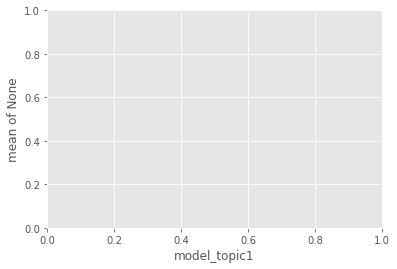

In [21]:
plt.style.use('ggplot')
fig = interaction_plot(
   x        = comment,
   trace    = gender,
   response = Fit.fittedvalues,
   colors   = ['red','blue'],
   markers  = ['D','^'])
plt.xlabel('model_topic1')
plt.ylabel('musicscore_log')
plt.legend().set_title(None)
plt.show()